In [5]:
import pandas as pd
import numpy as np
import os

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/CaptaiN785/DL-Notebooks/main/Churn-modeling/Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
## Collecting the required features for dependent and independent fetures
X = df.iloc[:, 3:-1]
y = df.iloc[:, -1]

In [8]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Feature engineering

In [10]:
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
geo = pd.get_dummies(X['Geography'], drop_first=True)

In [12]:
geo.head(2)

,Germany,Spain
0,0,0
1,0,1


In [13]:
gender = pd.get_dummies(X['Gender'], drop_first = True)
gender.head(2)

,Male
0,0
1,0


In [14]:
X.drop(['Geography', 'Gender'], axis = 1, inplace = True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [15]:
X = pd.concat([X, geo, gender], axis = 1)

In [16]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0


In [17]:
## splitting the dataset into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [18]:
## Feature scaling
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train[0], X_test[0]

(array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
         0.64920267,  0.97481699,  1.36766974, -0.57946723, -0.57638802,
         0.91324755]),
 array([-0.57749609, -0.6557859 , -0.69539349,  0.32993735,  0.80843615,
        -1.54035103, -1.02583358, -1.01960511,  1.72572313, -0.57638802,
         0.91324755]))

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [22]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
## Creating the models

model = Sequential()

In [71]:
model.add(Dense(units = 11, activation = 'relu'))
model.add(Dense(22, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [73]:
## Adding early stopping here..
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001, # if improvement is less than value, it will stop training
    patience=5, # if training is not improving, it will wait for 3 more epochs then it will stop training
    verbose=1, # 1 means show output 0 means no output
    mode='auto', # depends on monitor (auto can help in any kind of monitor)
    baseline=None, 
    restore_best_weights=False
)

In [74]:
history = model.fit(X_train, y_train,
                    # validation_data = (X_test, y_test),
                    validation_split = 0.33,
                    batch_size = 32,
                    epochs = 50,
                    callbacks= [early_stopping])

Epoch 1/50
168/168 [==============================] - 1s 5ms/step - loss: 0.5560 - accuracy: 0.7944 - val_loss: 0.5077 - val_accuracy: 0.7910
Epoch 2/50
168/168 [==============================] - 1s 4ms/step - loss: 0.4909 - accuracy: 0.7962 - val_loss: 0.4732 - val_accuracy: 0.7910
Epoch 3/50
168/168 [==============================] - 1s 4ms/step - loss: 0.4593 - accuracy: 0.7962 - val_loss: 0.4526 - val_accuracy: 0.7910
Epoch 4/50
168/168 [==============================] - 1s 4ms/step - loss: 0.4454 - accuracy: 0.7962 - val_loss: 0.4468 - val_accuracy: 0.7910
Epoch 5/50
168/168 [==============================] - 1s 5ms/step - loss: 0.4406 - accuracy: 0.7962 - val_loss: 0.4477 - val_accuracy: 0.7910
Epoch 6/50
168/168 [==============================] - 1s 5ms/step - loss: 0.4377 - accuracy: 0.7962 - val_loss: 0.4384 - val_accuracy: 0.7910
Epoch 7/50
168/168 [==============================] - 1s 5ms/step - loss: 0.4297 - accuracy: 0.8138 - val_loss: 0.4360 - val_accuracy: 0.8292
Epoch 

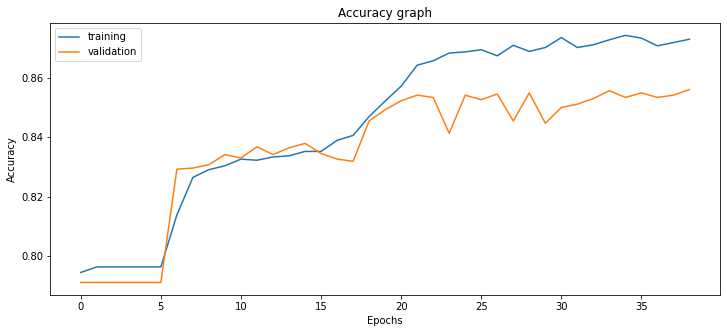

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy graph")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'])
plt.show()


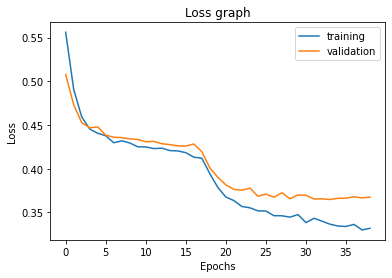

In [76]:
# plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss graph")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training', 'validation'])
plt.show()


In [77]:
y_pred = model.predict(X_test)

In [78]:
y_pred = (y_pred >= 0.5)*1

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [80]:
confusion_matrix(y_pred, y_test)

array([[1543,  211],
       [  64,  182]])

In [81]:
accuracy_score(y_pred, y_test)

0.8625

In [82]:
## Get the model weights
model.get_weights()

[array([[-1.06148664e-02, -1.53131830e-02, -1.84950143e-01,
         -2.32030842e-02,  6.27462566e-02,  4.71836291e-02,
         -3.47507410e-02,  2.17556760e-01,  4.12210412e-02,
         -1.27558457e-02,  3.10251005e-02],
        [-2.58487880e-01,  1.96470797e-01, -3.16099793e-01,
          4.54740196e-01, -8.67413640e-01,  6.34168327e-01,
         -4.74090576e-02, -5.11859536e-01, -8.15307140e-01,
          1.24500953e-01, -1.74067110e-01],
        [-1.19437881e-01, -3.03789407e-01, -3.03222276e-02,
         -8.26258734e-02, -1.26028597e-01,  1.11778453e-03,
          2.12528348e-01, -1.78616285e-01, -5.86806349e-02,
         -6.82616327e-03, -1.42135713e-02],
        [-1.06718993e+00, -5.53738952e-01, -7.59491920e-01,
          2.86674052e-01,  7.59411514e-01, -2.42241085e-01,
         -2.49931365e-01,  3.46379280e-01,  3.20743591e-01,
         -9.25435452e-04, -1.19721301e-01],
        [ 6.66998565e-01,  1.70875937e-01,  6.89754710e-02,
          5.38450360e-01, -1.18730888e-01, -